In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import csv, sqlite3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb  # Import the XGBoost library
from sklearn.pipeline import Pipeline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Suppress specific warnings or all warnings
warnings.filterwarnings('ignore')

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# House Pricing Dataset - PIPELINE Excercise

## Remark

This analysis is redone as for "House Pricing Dataset", but encouraging Pipelines and ML project approach given in Aurelion Geron "..." book. 


## Overview
Title: House Prices: Advanced Regression Techniques
Source: Kaggle House Prices Dataset
Goal: Predict the sale prices of houses based on various features.
Description: 
The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This dataset is often used to explore advanced regression techniques, feature engineering, and model evaluation.

## Files
* train.csv: The training dataset with features and the target variable (SalePrice).
* test.csv: The test dataset with features only, used for making predictions.
* data_description.txt: Detailed description of each feature in the dataset.
* sample_submission.csv: A sample submission file in the correct format.

## Key Features

The dataset includes numerous features describing the properties. Here is a summary of some key features:

<div style="display: flex;">

<div style="flex: 1; padding: 10px;">
    
| Feature            | Description                                                   |
|--------------------|---------------------------------------------------------------|
| `Id`               | Unique identifier for each property                           |
| `MSSubClass`       | The building class                                            |
| `MSZoning`         | The general zoning classification                             |
| `LotFrontage`      | Linear feet of street connected to the property               |
| `LotArea`          | Lot size in square feet                                       |
| `Street`           | Type of road access to the property                           |
| `Alley`            | Type of alley access to the property                          |
| `LotShape`         | General shape of property                                     |
| `LandContour`      | Flatness of the property                                      |
| `Utilities`        | Type of utilities available                                   |
| `LotConfig`        | Lot configuration                                             |
| `LandSlope`        | Slope of property                                             |
| `Neighborhood`     | Physical locations within Ames city limits                    |
| `Condition1`       | Proximity to main road or railroad                            |
| `Condition2`       | Proximity to main road or railroad (if a second is present)   |
| `BldgType`         | Type of dwelling                                             |
| `HouseStyle`       | Style of dwelling                                             |
| `OverallQual`      | Overall material and finish quality                           |
| `OverallCond`      | Overall condition rating                                      |
| `YearBuilt`        | Original construction date                                    |
| `YearRemodAdd`     | Remodel date                                                  |
| `RoofStyle`        | Type of roof                                                  |
| `RoofMatl`         | Roof material                                                 |
| `Exterior1st`      | Exterior covering on house                                    |
| `Exterior2nd`      | Exterior covering on house (if more than one material)        |
| `MasVnrType`       | Masonry veneer type                                           |
| `MasVnrArea`       | Masonry veneer area in square feet                            |
| `ExterQual`        | Exterior material quality                                     |
| `ExterCond`        | Present condition of the material on the exterior             |
| `Foundation`       | Type of foundation                                            |
| `BsmtQual`         | Height of the basement                                       |
| `BsmtCond`         | General condition of the basement                             |
| `BsmtExposure`     | Walkout or garden level basement walls                        |
| `BsmtFinType1`     | Quality of basement finished area                             |
| `BsmtFinSF1`       | Type 1 finished square feet                                   |
| `BsmtFinType2`     | Quality of second finished area (if present)                  |
| `BsmtFinSF2`       | Type 2 finished square feet                                   |
| `BsmtUnfSF`        | Unfinished square feet of basement                            |
| `TotalBsmtSF`      | Total square feet of basement area                            |
</div>

<div style="flex: 1; padding: 10px;">

| Feature            | Description                                                   |
|--------------------|---------------------------------------------------------------|
| `Heating`          | Type of heating                                               |
| `HeatingQC`        | Heating quality and condition                                 |
| `CentralAir`       | Central air conditioning (Y/N)                                |
| `Electrical`       | Electrical system                                             |
| `1stFlrSF`         | First-floor square feet                                       |
| `2ndFlrSF`         | Second-floor square feet                                      |
| `LowQualFinSF`     | Low-quality finished square feet (all floors)                 |
| `GrLivArea`        | Above grade (ground) living area square feet                  |
| `BsmtFullBath`     | Basement full bathrooms                                       |
| `BsmtHalfBath`     | Basement half bathrooms                                       |
| `FullBath`         | Full bathrooms above grade                                    |
| `HalfBath`         | Half baths above grade                                        |
| `BedroomAbvGr`     | Number of bedrooms above basement level                       |
| `KitchenAbvGr`     | Number of kitchens                                            |
| `KitchenQual`      | Kitchen quality                                               |
| `TotRmsAbvGrd`     | Total rooms above grade (does not include bathrooms)          |
| `Functional`       | Home functionality rating                                     |
| `Fireplaces`       | Number of fireplaces                                          |
| `FireplaceQu`      | Fireplace quality                                             |
| `GarageType`       | Garage location                                               |
| `GarageYrBlt`      | Year garage was built                                         |
| `GarageFinish`     | Interior finish of the garage                                 |
| `GarageCars`       | Size of garage in car capacity                                |
| `GarageArea`       | Size of garage in square feet                                 |
| `GarageQual`       | Garage quality                                                |
| `GarageCond`       | Garage condition                                              |
| `PavedDrive`       | Paved driveway (Y/N)                                          |
| `WoodDeckSF`       | Wood deck area in square feet                                 |
| `OpenPorchSF`      | Open porch area in square feet                                |
| `EnclosedPorch`    | Enclosed porch area in square feet                            |
| `3SsnPorch`        | Three-season porch area in square feet                        |
| `ScreenPorch`      | Screen porch area in square feet                              |
| `PoolArea`         | Pool area in square feet                                      |
| `PoolQC`           | Pool quality                                                  |
| `Fence`            | Fence quality                                                 |
| `MiscFeature`      | Miscellaneous feature not covered in other categories         |
| `MiscVal`          | Value of miscellaneous feature                                |
| `MoSold`           | Month sold                                                    |
| `YrSold`           | Year sold                                                     |
| `SaleType`         | Type of sale                                                  |
| `SaleCondition`    | Condition of sale                                             |
| `SalePrice`        | Sale price of the property                                    |

</div>
    
</div>
This dataset is great for practicing data preprocessing, feature engineering, and building regression models. You can find the dataset and more details on the Kaggle competition page: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).


## Get data

In [2]:
# Load datasets
#train_data = pd.read_csv("C:/Users/dasgu/Downloads/train.csv")
#test_data = pd.read_csv("C:/Users/dasgu/Downloads/test.csv")
housing_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
housing_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


## Take a Quick Look at the Data Structure

In [3]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Summary statistics of the training dataset
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This datasets contains a large number of attributes, including majority of object categories. 

*  unique(): Zwraca wszystkie unikalne wartości w kolumnie.
*  len(values): Liczy liczbę unikalnych wartości.
*  list(values): Wyświetla unikalne wartości w formie listy w nawiasach. Możesz dostosować format, jeśli lista jest zbyt długa, np. ograniczyć liczbę wyświetlanych wartości. {list(values[:5])} 

In [5]:
# Wybieramy kolumny typu object
object_columns = housing_train.select_dtypes(include=['object'])

# Iterujemy przez kolumny i liczymy unikalne wartości
unique_values_count = {col: housing_train[col].nunique() for col in object_columns.columns}

# Wyświetlamy wynik
for col, count in unique_values_count.items():
    print(f"Column '{col}'has {count} uniqe values.")

Column 'MSZoning'has 5 uniqe values.
Column 'Street'has 2 uniqe values.
Column 'Alley'has 2 uniqe values.
Column 'LotShape'has 4 uniqe values.
Column 'LandContour'has 4 uniqe values.
Column 'Utilities'has 2 uniqe values.
Column 'LotConfig'has 5 uniqe values.
Column 'LandSlope'has 3 uniqe values.
Column 'Neighborhood'has 25 uniqe values.
Column 'Condition1'has 9 uniqe values.
Column 'Condition2'has 8 uniqe values.
Column 'BldgType'has 5 uniqe values.
Column 'HouseStyle'has 8 uniqe values.
Column 'RoofStyle'has 6 uniqe values.
Column 'RoofMatl'has 8 uniqe values.
Column 'Exterior1st'has 15 uniqe values.
Column 'Exterior2nd'has 16 uniqe values.
Column 'MasVnrType'has 3 uniqe values.
Column 'ExterQual'has 4 uniqe values.
Column 'ExterCond'has 5 uniqe values.
Column 'Foundation'has 6 uniqe values.
Column 'BsmtQual'has 4 uniqe values.
Column 'BsmtCond'has 4 uniqe values.
Column 'BsmtExposure'has 4 uniqe values.
Column 'BsmtFinType1'has 6 uniqe values.
Column 'BsmtFinType2'has 6 uniqe values.

In [6]:
housing_train["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [7]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


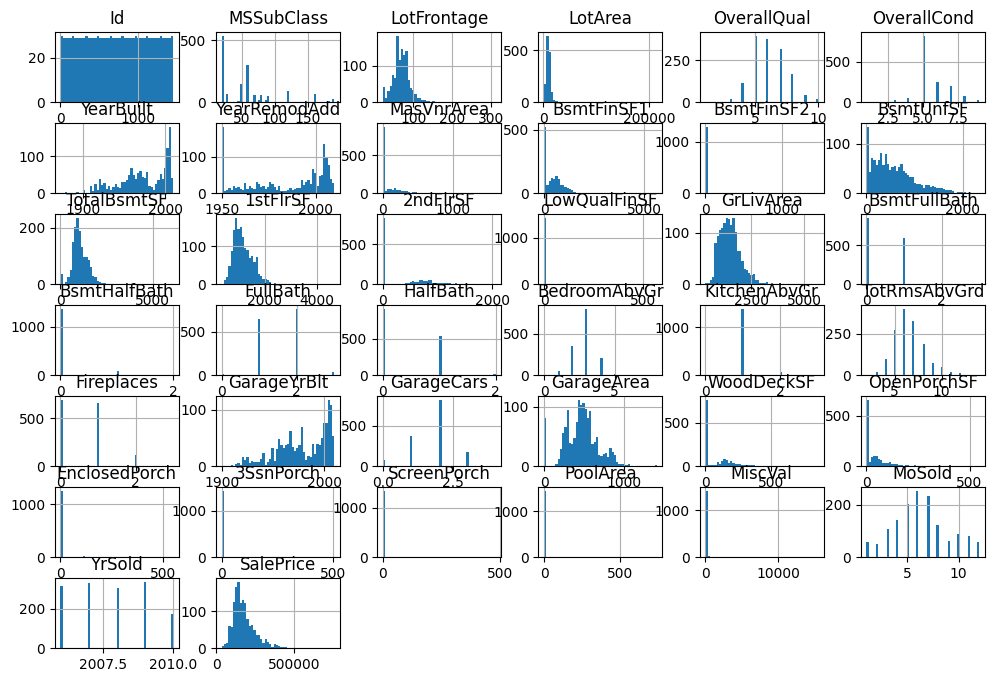

In [8]:
housing_train.hist(bins=50, figsize=(12, 8))
plt.show()

Since there is a lot of features to handle, and this project is focused on Pipeline building mainly, let's reduce the number of features basing on humnan-decision what is relevant in SalePrice and also looking on histograms above. Create additional feature marking if house has any luxury features or not:

In [9]:
# List of features to check
luxury_features = ["PoolArea", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]

# Create the new feature
housing_train['LuxAddon'] = housing_train[luxury_features].apply(
    lambda row: 1 if any((row > 0) & (~row.isna())) else 0, axis=1
)
housing_test['LuxAddon'] = housing_test[luxury_features].apply(
    lambda row: 1 if any((row > 0) & (~row.isna())) else 0, axis=1
)
# Display the updated DataFrame
print(housing_train[['LuxAddon'] + luxury_features].head())

   LuxAddon  PoolArea  Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch
0         1         0           0           0           61              0
1         1         0           1         298            0              0
2         1         0           1           0           42              0
3         1         0           1           0           35            272
4         1         0           1         192           84              0


In [10]:
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LuxAddon         0.281720
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

In [11]:
# List of features to keep
#X_features = ["MSZoning", "OverallQual", "LotArea", "Street", "GrLivArea", "LotShape", "Condition1", "BldgType", 
#    "YearBuilt", "YearRemodAdd", "ExterQual", "BsmtQual", "TotalBsmtSF", 
#    "HeatingQC", "Electrical", "1stFlrSF", "2ndFlrSF", "Neighborhood", "FullBath", "HalfBath",
#    "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", 
#    "Functional", "GarageArea", "SaleCondition", "LuxAddon"
#]

X_features = ["OverallQual", "GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", 
    "YearRemodAdd", "GarageYrBlt", "MasVnrArea", "BsmtFinSF1", "LotFrontage", "LuxAddon", "HalfBath","KitchenAbvGr",
    "MSZoning", "Condition1", "BldgType", "Electrical", "Neighborhood", "SaleCondition",
    "ExterQual", "BsmtQual", "HeatingQC", "KitchenQual", "Functional"]

# Target column
y_target = ["SalePrice"]

features_to_keep_train = X_features + y_target
features_to_keep_test = X_features


# Keep only the specified columns
housing_train = housing_train[features_to_keep_train]
housing_test = housing_test[features_to_keep_test]

# Display the updated DataFrame
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   1stFlrSF       1460 non-null   int64  
 5   FullBath       1460 non-null   int64  
 6   TotRmsAbvGrd   1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   GarageYrBlt    1379 non-null   float64
 10  MasVnrArea     1452 non-null   float64
 11  BsmtFinSF1     1460 non-null   int64  
 12  LotFrontage    1201 non-null   float64
 13  LuxAddon       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  KitchenAbvGr   1460 non-null   int64  
 16  MSZoning       1460 non-null   object 
 17  Condition1     1460 non-null   object 
 18  BldgType

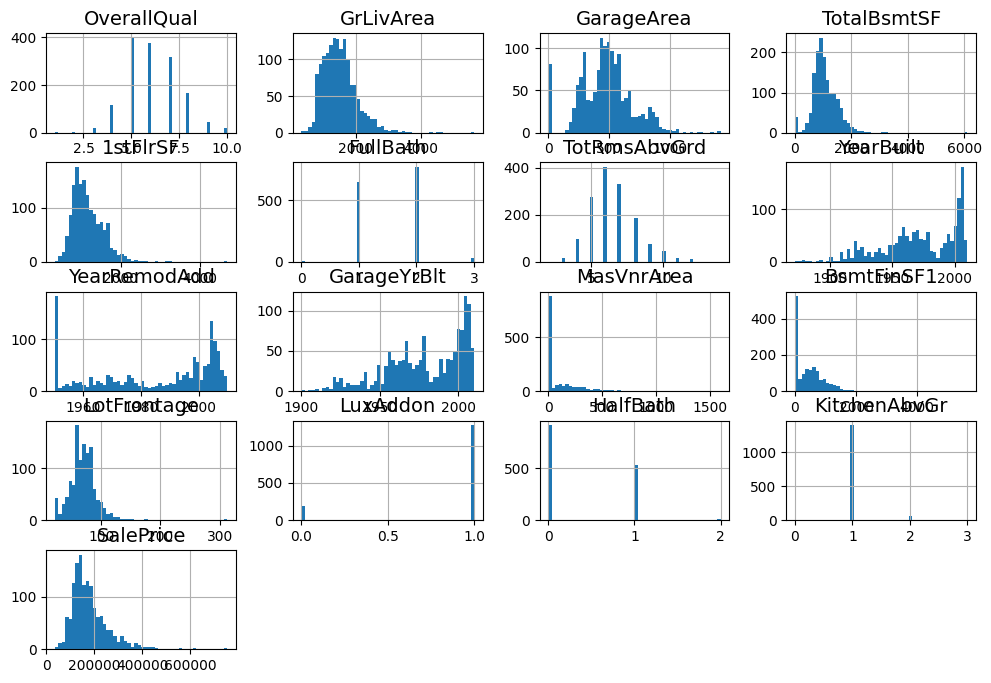

In [12]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_train.hist(bins=50, figsize=(12, 8))
plt.show()

## Looking for correlations

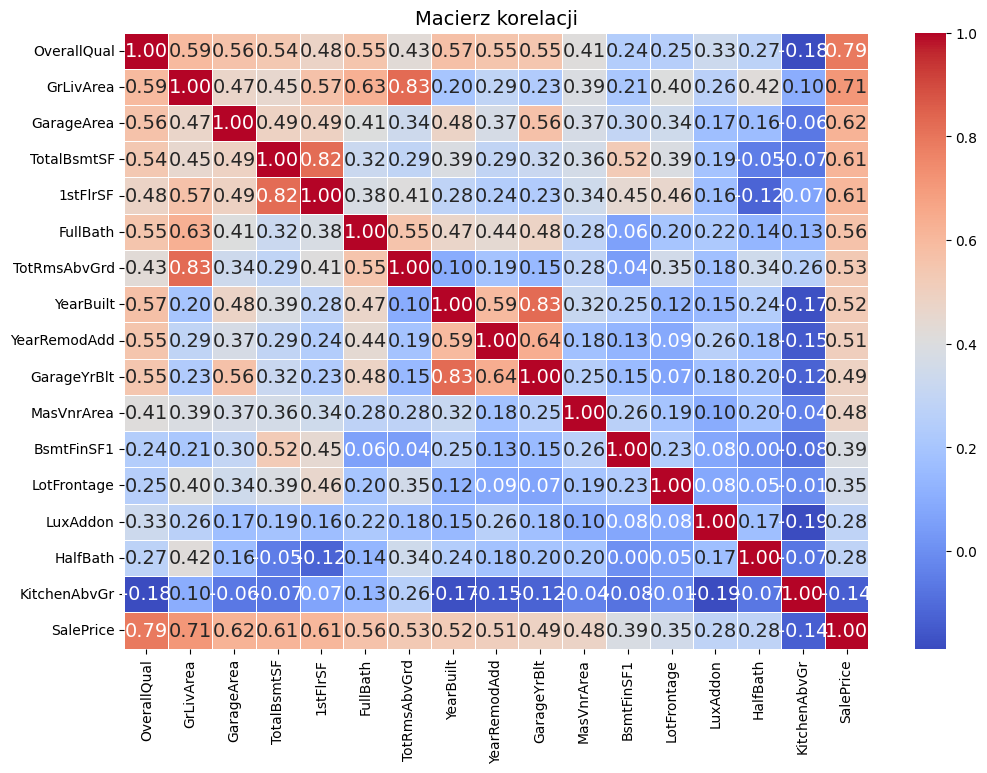

In [13]:
corr_matrix = housing_train.corr(numeric_only=True)
# Wyświetl macierz korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

In [14]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
LotFrontage     0.351799
HalfBath        0.284108
LuxAddon        0.281720
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

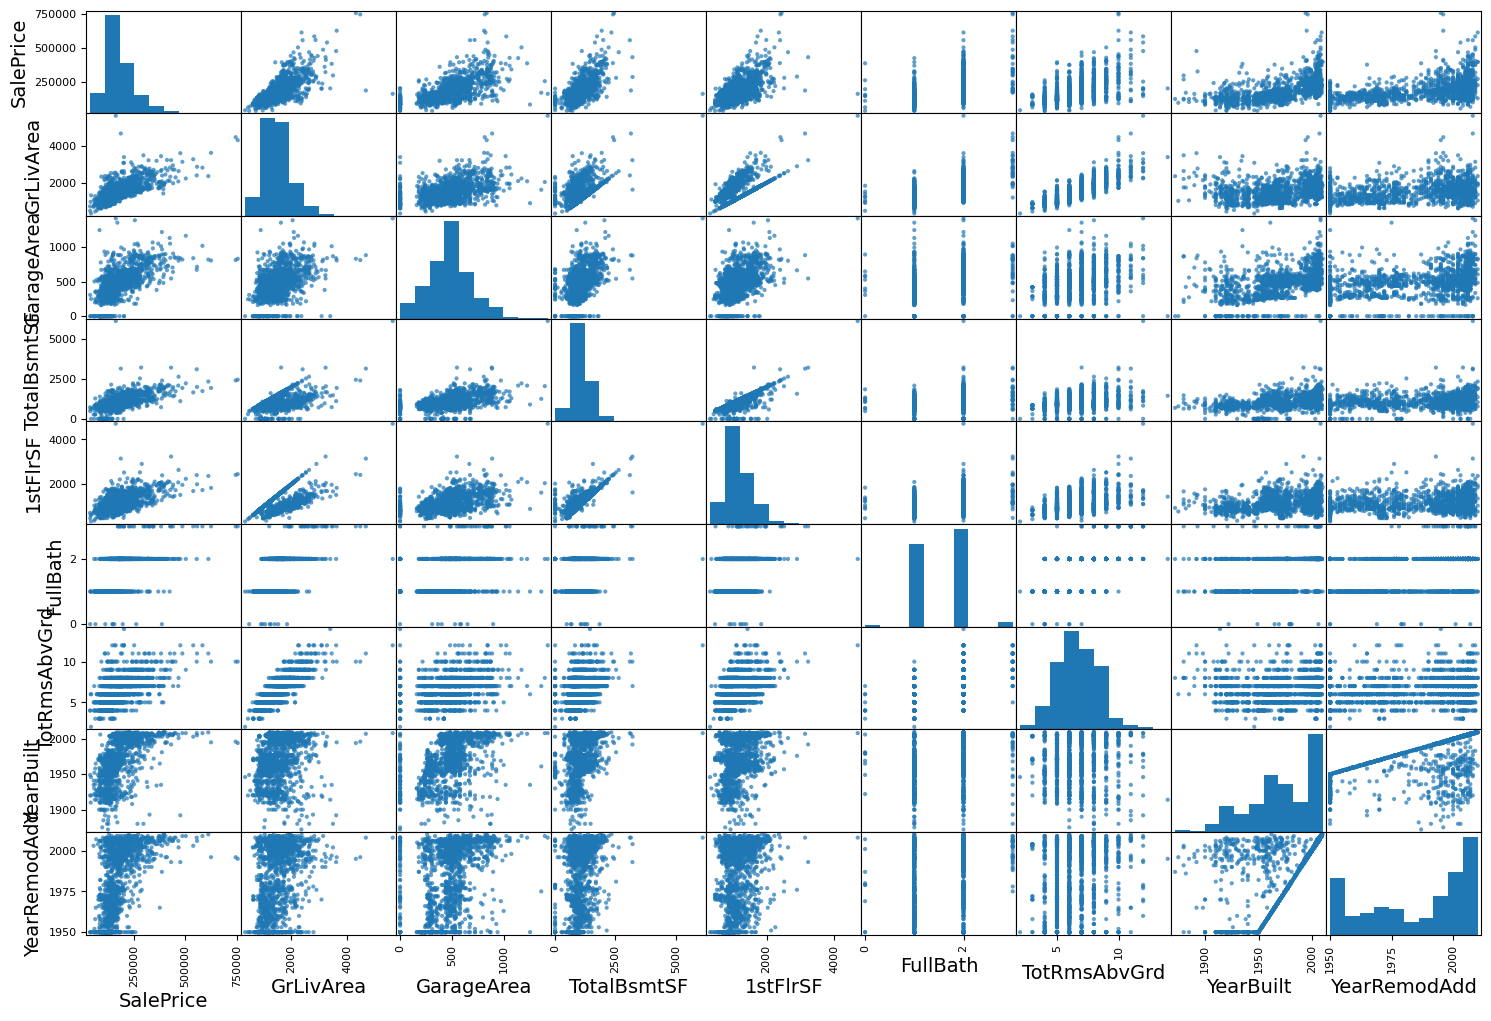

In [15]:
from pandas.plotting import scatter_matrix

# Wybierz tylko zmienne numeryczne
numeric_cols = housing_train.select_dtypes(include=['number'])

# Lista atrybutów, które chcesz uwzględnić
attributes = ["SalePrice", 'GrLivArea', "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]

# Upewnij się, że wszystkie atrybuty znajdują się w zbiorze danych
attributes = [attr for attr in attributes if attr in numeric_cols.columns]

# Generuj scatter matrix z wybranymi atrybutami
scatter_matrix(housing_train[attributes], figsize=(18, 12), alpha=0.7, diagonal='hist')
plt.show()

## Experimenting with Attribute Combinations

In [16]:
#housing_train["Area_per_piece"] = housing_train["GrLivArea"]/ (housing_train["TotRmsAbvGrd"]+housing_train["FullBath"]+housing_train["HalfBath"]+housing_train["KitchenAbvGr"])
#housing_train["Rooms_per_bathroom "] = housing_train["TotRmsAbvGrd"]/(housing_train["FullBath"]+housing_train["HalfBath"])

for data_set in [housing_train, housing_test]:
    data_set["Area_per_piece"] = data_set["GrLivArea"]/ (data_set["TotRmsAbvGrd"]+data_set["FullBath"]+data_set["HalfBath"]+data_set["KitchenAbvGr"])
    data_set["Rooms_per_bathroom "] = data_set["TotRmsAbvGrd"]/(data_set["FullBath"]+data_set["HalfBath"])


In [17]:
X_features = X_features + ["Rooms_per_bathroom ", "Area_per_piece"]

In [18]:
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice              1.000000
OverallQual            0.790982
GrLivArea              0.708624
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852
Area_per_piece         0.566461
FullBath               0.560664
TotRmsAbvGrd           0.533723
YearBuilt              0.522897
YearRemodAdd           0.507101
GarageYrBlt            0.486362
MasVnrArea             0.477493
BsmtFinSF1             0.386420
LotFrontage            0.351799
HalfBath               0.284108
LuxAddon               0.281720
KitchenAbvGr          -0.135907
Rooms_per_bathroom    -0.344279
Name: SalePrice, dtype: float64

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

In [19]:
numeric_cols = housing_train.select_dtypes(include=[np.number]).columns
print(type(numeric_cols))  # Sprawdza typ obiektu numeric_cols


<class 'pandas.core.indexes.base.Index'>


In [20]:
print(housing_train[numeric_cols].isna().sum())  # Sprawdza brakujące wartości

OverallQual              0
GrLivArea                0
GarageArea               0
TotalBsmtSF              0
1stFlrSF                 0
FullBath                 0
TotRmsAbvGrd             0
YearBuilt                0
YearRemodAdd             0
GarageYrBlt             81
MasVnrArea               8
BsmtFinSF1               0
LotFrontage            259
LuxAddon                 0
HalfBath                 0
KitchenAbvGr             0
SalePrice                0
Area_per_piece           0
Rooms_per_bathroom       0
dtype: int64


In [21]:
print(np.isinf(housing_train[numeric_cols]).sum())  # Sprawdza wartości nieskończone

OverallQual            0
GrLivArea              0
GarageArea             0
TotalBsmtSF            0
1stFlrSF               0
FullBath               0
TotRmsAbvGrd           0
YearBuilt              0
YearRemodAdd           0
GarageYrBlt            0
MasVnrArea             0
BsmtFinSF1             0
LotFrontage            0
LuxAddon               0
HalfBath               0
KitchenAbvGr           0
SalePrice              0
Area_per_piece         0
Rooms_per_bathroom     3
dtype: int64


In [22]:
housing_train[numeric_cols] = housing_train[numeric_cols].replace([np.inf, -np.inf], np.nan)

In [23]:
missing_values = housing_train.select_dtypes(include=['number']).isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

GarageYrBlt             81
MasVnrArea               8
LotFrontage            259
Rooms_per_bathroom       3
dtype: int64


There is no missing value in dataset, we go to next step.

In [24]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

def preprocess_data_with_median(df):
  
    # Wybieranie kolumn numerycznych
    numeric_cols = df.select_dtypes(include=[np.number])

    imputer = SimpleImputer(strategy="median")
    imputer.fit(numeric_cols)    
    transformed_data = imputer.transform(numeric_cols)   


    # Tworzenie nowego DataFrame z przetworzonymi danymi
    df_processed = pd.DataFrame(
        transformed_data,
        columns=numeric_cols.columns,
        index=df.index
    )

    # Zastąpienie oryginalnych kolumn numerycznych przetworzonymi danymi
    df.update(df_processed)

    return df

housing_train = preprocess_data_with_median(housing_train)
housing_test = preprocess_data_with_median(housing_test)


Now let's drop some outliers:

In [25]:
from sklearn.ensemble import IsolationForest

# Wybieranie kolumn numerycznych
numeric_cols = housing_train.select_dtypes(include=['number']).columns

# Tworzenie modelu IsolationForest
isolation_forest = IsolationForest(random_state=42)

# Dopasowanie modelu do danych numerycznych i przewidywanie anomalii
outlier_pred = isolation_forest.fit_predict(housing_train[numeric_cols])

# Wyświetlenie wyników
outliers_count = np.sum(outlier_pred == -1)
print(f"Outliers: {outliers_count}")

Outliers: 168


In case one wants to drop outliers:

In [26]:
# Tworzenie maski logicznej: True dla inliers (1), False dla outliers (-1)
mask = outlier_pred == 1

# Usunięcie outliers
housing_train_cleaned = housing_train[mask].reset_index(drop=True)

# Wyświetlenie wyników
print(f"Number of entries before removing outliers: {housing_train.shape[0]}")
print(f"Number of entries after removing outliers: {housing_train_cleaned.shape[0]}")

Number of entries before removing outliers: 1460
Number of entries after removing outliers: 1292


## Handling Text and Categorical Attributes

In [27]:
# Identify columns with object data type
object_columns = housing_train.select_dtypes(include=['object']).columns
 
for item in object_columns:
    print(f"Value counts for {item}:")
    print(housing_train[item].value_counts())
    print("\n")
    
# Lists for OneHotEncoding and OrdinalEncoding
onehot_columns = ["MSZoning", "Condition1", "BldgType", "Electrical", "Neighborhood", "SaleCondition"]
ordinal_columns = ["ExterQual", "BsmtQual", "HeatingQC", "KitchenQual", "Functional"]

Value counts for MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Value counts for Condition1:
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


Value counts for BldgType:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


Value counts for Electrical:
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


Value counts for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Ve

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Create the OneHotEncoder and OrdinalEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' avoids multicollinearity
ordinal_encoder = OrdinalEncoder()

# Apply OneHotEncoding to specified columns
housing_train_onehot = pd.DataFrame(onehot_encoder.fit_transform(housing_train[onehot_columns]))
housing_train_onehot.columns = onehot_encoder.get_feature_names_out(onehot_columns)

# Apply OrdinalEncoding to specified columns
housing_train_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(housing_train[ordinal_columns]))
housing_train_ordinal.columns = ordinal_columns
housing_train_ordinal.columns = [col + '_en' for col in ordinal_columns]

# Combine the original DataFrame with the encoded columns
housing_train_encoded = pd.concat([housing_train, housing_train_onehot, housing_train_ordinal], axis=1)

# Optionally drop the original categorical columns that were encoded
housing_train_encoded.drop(onehot_columns+ordinal_columns, axis=1, inplace=True)

# Display the resulting DataFrame
housing_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1460 non-null   int64  
 1   GrLivArea              1460 non-null   int64  
 2   GarageArea             1460 non-null   int64  
 3   TotalBsmtSF            1460 non-null   int64  
 4   1stFlrSF               1460 non-null   int64  
 5   FullBath               1460 non-null   int64  
 6   TotRmsAbvGrd           1460 non-null   int64  
 7   YearBuilt              1460 non-null   int64  
 8   YearRemodAdd           1460 non-null   int64  
 9   GarageYrBlt            1460 non-null   float64
 10  MasVnrArea             1460 non-null   float64
 11  BsmtFinSF1             1460 non-null   int64  
 12  LotFrontage            1460 non-null   float64
 13  LuxAddon               1460 non-null   int64  
 14  HalfBath               1460 non-null   int64  
 15  Kitc

In [29]:
# Uzupełnienie brakujących wartości za pomocą SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Użycie najczęściej występującej wartości
housing_train_encoded[housing_train_onehot.columns] = imputer.fit_transform(housing_train_encoded[housing_train_onehot.columns])
housing_train_encoded[housing_train_ordinal.columns] = imputer.fit_transform(housing_train_encoded[housing_train_ordinal.columns])

# Display the resulting DataFrame
housing_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1460 non-null   int64  
 1   GrLivArea              1460 non-null   int64  
 2   GarageArea             1460 non-null   int64  
 3   TotalBsmtSF            1460 non-null   int64  
 4   1stFlrSF               1460 non-null   int64  
 5   FullBath               1460 non-null   int64  
 6   TotRmsAbvGrd           1460 non-null   int64  
 7   YearBuilt              1460 non-null   int64  
 8   YearRemodAdd           1460 non-null   int64  
 9   GarageYrBlt            1460 non-null   float64
 10  MasVnrArea             1460 non-null   float64
 11  BsmtFinSF1             1460 non-null   int64  
 12  LotFrontage            1460 non-null   float64
 13  LuxAddon               1460 non-null   int64  
 14  HalfBath               1460 non-null   int64  
 15  Kitc

## Feature scaling

In [30]:
numeric_cols

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'LuxAddon', 'HalfBath',
       'KitchenAbvGr', 'SalePrice', 'Area_per_piece', 'Rooms_per_bathroom '],
      dtype='object')

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Przygotowanie skalera
standard_scaler = StandardScaler()

# Przeskalowanie danych
housing_train_scaled = standard_scaler.fit_transform(housing_train_encoded)

# Konwersja wyniku z powrotem na DataFrame z zachowaniem nazw kolumn
housing_train_scaled = pd.DataFrame(
    housing_train_scaled, 
    columns=housing_train_encoded.columns  # Zachowanie oryginalnych nazw kolumn
)

# Wyświetlenie pierwszych 5 wierszy
housing_train_scaled.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual_en,BsmtQual_en,HeatingQC_en,KitchenQual_en,Functional_en
0,0.651479,0.370333,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,1.017598,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.777976,-0.324152,-0.884658,-0.409369,0.255978
1,-0.071836,-0.482512,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,-0.107927,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.663451,-0.324152,-0.884658,0.795629,0.255978
2,0.651479,0.515013,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,0.934226,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.777976,-0.324152,-0.884658,-0.409369,0.255978
3,0.651479,0.383659,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,0.809167,...,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,0.663451,0.832969,0.265476,-0.409369,0.255978
4,1.374795,1.299326,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,0.892540,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.777976,-0.324152,-0.884658,-0.409369,0.255978


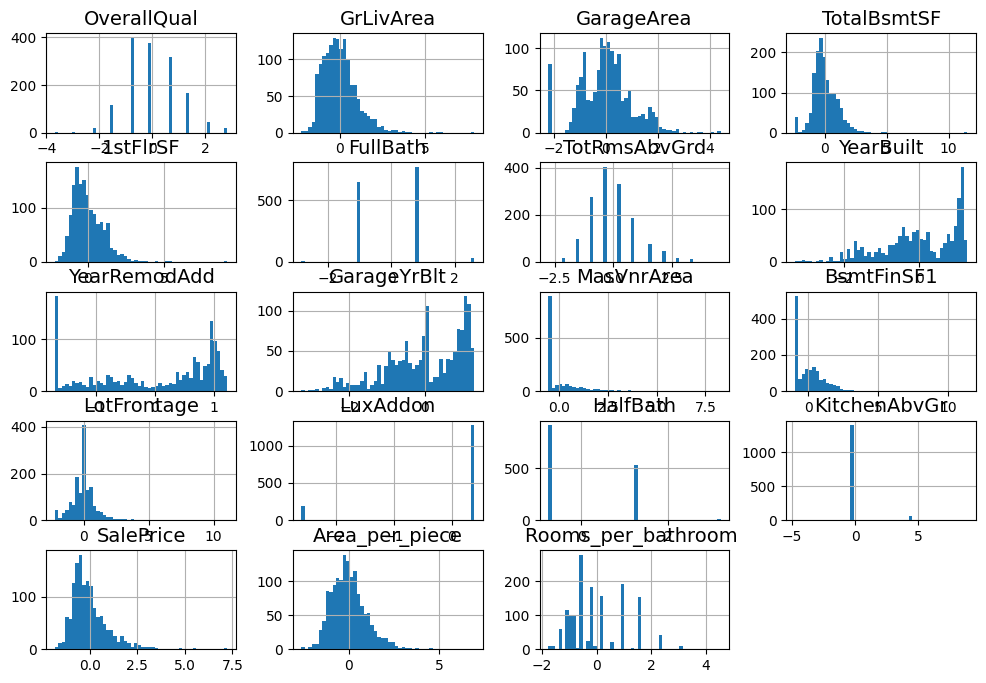

In [32]:
housing_train_scaled[numeric_cols].hist(bins=50, figsize=(12, 8))
plt.show()

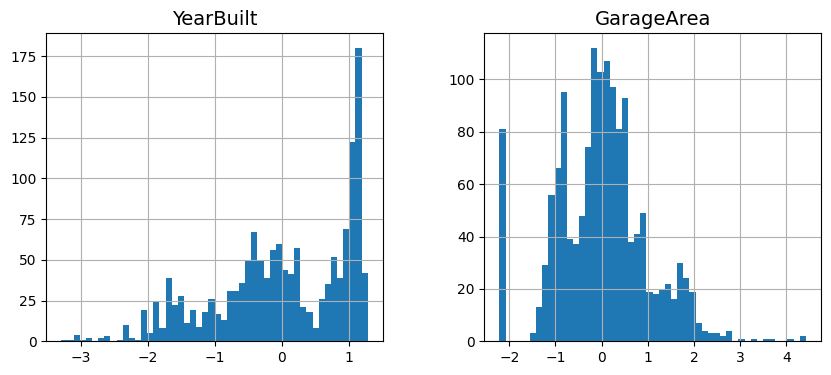

In [33]:
to_plot = ["YearBuilt", "GarageArea"]
housing_train_scaled[to_plot].hist(bins=50, figsize=(10, 4))
plt.show()

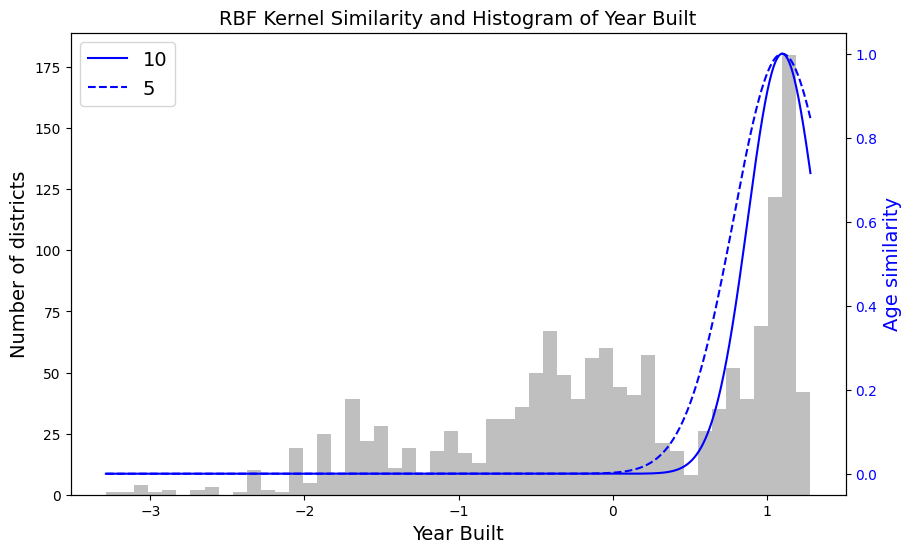

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Ustalanie wartości dla wieku budynków
ages = np.linspace(housing_train_scaled["YearBuilt"].min(),
                   housing_train_scaled["YearBuilt"].max(),
                   1000).reshape(-1, 1)

# Ustalanie wartości gamma
gamma1 = 10
gamma2 = 5

# Obliczanie jądra RBF dla różnych wartości gamma
rbf1 = rbf_kernel(ages, [[1.1]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[1.1]], gamma=gamma2)

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(10, 6))  # Ustalanie rozmiaru wykresu

# Wykres histogramu dla wieku budynków
ax1.set_xlabel("Year Built")
ax1.set_ylabel("Number of districts")
ax1.hist(housing_train_scaled["YearBuilt"], bins=50, alpha=0.5, color='gray', label='Districts Histogram')

# Tworzenie drugiej osi y
ax2 = ax1.twinx()  # Tworzenie współdzielonej osi x
color = "blue"
ax2.plot(ages, rbf1, color=color, label=gamma1)
ax2.plot(ages, rbf2, color=color, label=gamma2, linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

# Dodawanie legendy
plt.legend(loc="upper left")
plt.title("RBF Kernel Similarity and Histogram of Year Built")
plt.show()

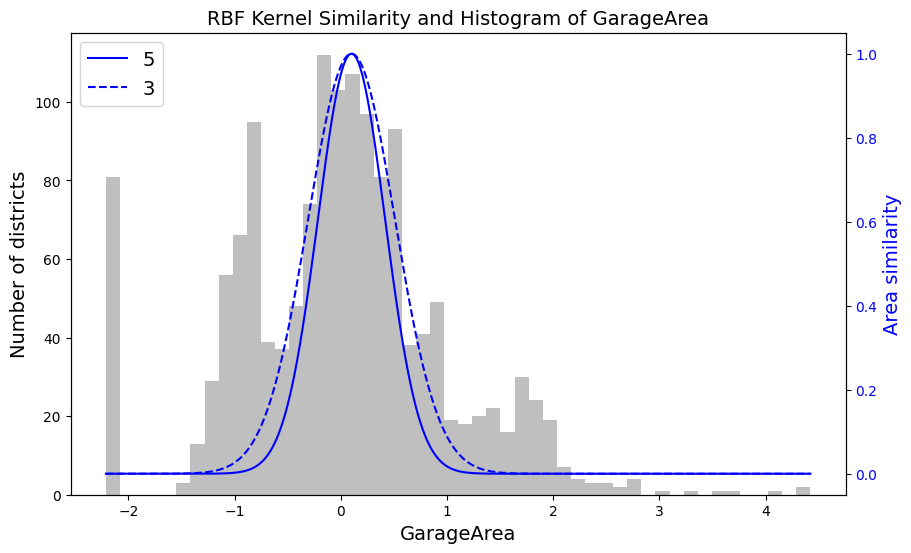

In [35]:
# Ustalanie wartości dla wieku budynków
ages = np.linspace(housing_train_scaled["GarageArea"].min(),
                   housing_train_scaled["GarageArea"].max(),
                   1000).reshape(-1, 1)

# Ustalanie wartości gamma
gamma1 = 5
gamma2 = 3

# Obliczanie jądra RBF dla różnych wartości gamma
rbf1 = rbf_kernel(ages, [[0.1]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[0.1]], gamma=gamma2)

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(10, 6))  # Ustalanie rozmiaru wykresu

# Wykres histogramu dla wieku budynków
ax1.set_xlabel("GarageArea")
ax1.set_ylabel("Number of districts")
ax1.hist(housing_train_scaled["GarageArea"], bins=50, alpha=0.5, color='gray', label='Districts Histogram')

# Tworzenie drugiej osi y
ax2 = ax1.twinx()  # Tworzenie współdzielonej osi x
color = "blue"
ax2.plot(ages, rbf1, color=color, label=gamma1)
ax2.plot(ages, rbf2, color=color, label=gamma2, linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Area similarity", color=color)

# Dodawanie legendy
plt.legend(loc="upper left")
plt.title("RBF Kernel Similarity and Histogram of GarageArea")
plt.show()

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel

ages = housing_train_scaled["YearBuilt"].values.reshape(-1, 1)
area = housing_train_scaled["GarageArea"].values.reshape(-1, 1)

rbf_values_year = rbf_kernel(ages, [[1.1]], gamma=10)
rbf_values_area = rbf_kernel(area, [[0.1]], gamma=5)

# Dodawanie nowej zmiennej RBF do DataFrame
housing_train_scaled['RBF_Kernel_YearBuild'] = rbf_values_year
housing_train_scaled['RBF_Kernel_GarageArea'] = rbf_values_area

housing_train_scaled.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'LuxAddon', 'HalfBath',
       'KitchenAbvGr', 'SalePrice', 'Area_per_piece', 'Rooms_per_bathroom ',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_SBrkr', 'Electrical_nan', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
  

In [37]:
housing_train_scaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1460 non-null   float64
 1   GrLivArea              1460 non-null   float64
 2   GarageArea             1460 non-null   float64
 3   TotalBsmtSF            1460 non-null   float64
 4   1stFlrSF               1460 non-null   float64
 5   FullBath               1460 non-null   float64
 6   TotRmsAbvGrd           1460 non-null   float64
 7   YearBuilt              1460 non-null   float64
 8   YearRemodAdd           1460 non-null   float64
 9   GarageYrBlt            1460 non-null   float64
 10  MasVnrArea             1460 non-null   float64
 11  BsmtFinSF1             1460 non-null   float64
 12  LotFrontage            1460 non-null   float64
 13  LuxAddon               1460 non-null   float64
 14  HalfBath               1460 non-null   float64
 15  Kitc

# Training the model

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Zakładając, że housing_train_scaled to Twój DataFrame z danymi

# 1. Wybór cech i etykiety
# Zastąp 'target_column' nazwą kolumny, której chcesz użyć jako zmiennej docelowej
X = housing_train_scaled.drop(columns=['SalePrice'])  # Usuwamy kolumnę z etykietą
y = housing_train_scaled['SalePrice']  # Kolumna z etykietą (cena lub inna zmienna)

# 2. Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Przewidywanie na zestawie testowym
y_pred = model.predict(X_test)

# 5. Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Opcjonalnie: Wyświetlenie współczynników regresji
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 0.17450082264800065
R^2 Score: 0.8565198184949079
                       Coefficient
OverallQual               0.180412
GrLivArea                 0.015651
GarageArea                0.075966
TotalBsmtSF              -0.009282
1stFlrSF                  0.097303
...                            ...
HeatingQC_en             -0.023913
KitchenQual_en           -0.089365
Functional_en             0.058542
RBF_Kernel_YearBuild     -0.199788
RBF_Kernel_GarageArea    -0.086936

[75 rows x 1 columns]


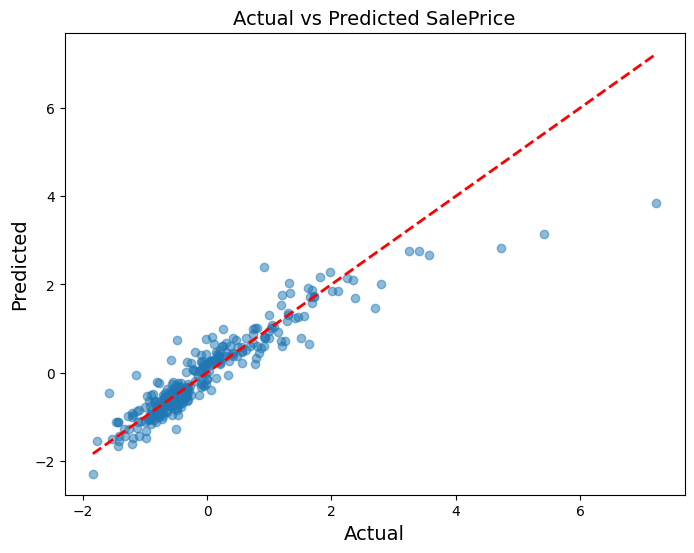

In [39]:

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted SalePrice')
plt.show()